In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
os.getcwd()

'C:\\Users\\pc'

In [9]:
path='C:\\Users\\pc\\downloads\\'

In [31]:
df=pd.read_csv(path+'Churn_Modelling.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
catego=df.select_dtypes(exclude='number')


In [23]:
cont=df.select_dtypes(include='number')


In [52]:
cont.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
#variable identification
#predict whether cstomer IsActiveMember(target)or not (i.e) other columns will be predictors
y=targets=df['IsActiveMember']
x=predictors=df.loc[:,df.columns!='IsActiveMember']


In [36]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: IsActiveMember, dtype: int64

In [37]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [38]:
#univariant analysis
#categorical varaiable-use frequency distribution


In [39]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [41]:
#analyze the target variable
df['IsActiveMember'].value_counts()


1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

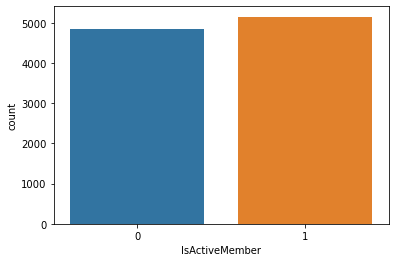

In [42]:
sns.countplot(data=df,x='IsActiveMember')


In [125]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)# to avoid warning


In [ ]:
#combined univariant analysis of evry variable
fig,axes=plt.subplots(2,4, figsize=(16,10))
sns.countplot('IsActiveMember',data=df,ax=axes[0,0])
sns.countplot('Geography',data=df,ax=axes[0,1])
sns.countplot('CreditScore',data=df,ax=axes[0,2])
sns.countplot('Tenure',data=df,ax=axes[0,3])
sns.countplot('Balance',data=df,ax=axes[0,1])
#sns.countplot('Age',data=df,ax=axes[0,2])
sns.countplot('Exited',data=df,ax=axes[0,3])
sns.countplot('NumOfProducts',data=df,ax=axes[0,1])
sns.countplot('HasCrCard',data=df,ax=axes[0,2])
sns.countplot('EstimatedSalary',data=df,ax=axes[0,1])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

In [ ]:

#bivariant
sns.catplot(x='Gender',col='IsActiveMember',data=df,kind='count',height=4,aspect=2)

In [ ]:
df.boxplot(column='Age,by='IsActiveMember')